# Informações sobre a base de dados
* Nome do dataset: adult.csv

* Descrição: Descrição: O nome da base de dados é adult.csv onde será realizada a classificação se determinado individuo recebe <=50K ou >50K, ou seja será realizada a Avaliação de Rendas

* Link fonte de dados: https://www.kaggle.com/uciml/adult-census-income?select=adult.csv

# Dicionario de dados com o nome de cada campo e os tipos dos dados
* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

# Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Biblioteca selecionar as melhores variaveis
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

# Biblioteca usada para deixar os valores na mesma escala
from sklearn.preprocessing import MinMaxScaler

# Biblioteca para treino, metricas 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Bibliotecas para balanceamento da base de dados
import imblearn
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import AllKNN
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.over_sampling import SMOTE, ADASYN 
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek

# Melhores Hiperparametros
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Algoritmos
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

* Criadas as classes TratamentoDados e ProcessamentoDados usadas no modulo A as mesmas serão importadas abaixo

In [2]:
from lib.processamento_dados import ProcessamentoDados as pr
from lib.tratamento_dados import TratamentoDados as tr

* Criada a classe features usada para a criação das novas features

### Ignora Warnings do python

In [3]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

## Importando as bases de dados

* Na modulo A do projeto optei por utilizar uma função para renomear as colunas do dataset a fim de mostrar os valores originais na modulo B resolvi utilizar o novo nome das colunas ao importar os dados do arquivo csv

In [4]:
# cabeçalho com o nome das colunas do dataset
header_columns = ['Idade', 'Classe Trabalho', 'Peso Final', 'Educacao', 'Num Educacao', 'Estado Civil', 
                  'Ocupacao','Relacao', 'Raca', 'Sexo', 'Ganho Capital', 'Perda Capital', 'Horas Semana', 
                  'Pais Nativo', 'Renda']

In [5]:
renda = pd.read_csv("base/adult.csv", names=header_columns, skiprows=1)

## Exbindo os dados do dataset 

In [6]:
renda.head()

,Idade,Classe Trabalho,Peso Final,Educacao,Num Educacao,Estado Civil,Ocupacao,Relacao,Raca,Sexo,Ganho Capital,Perda Capital,Horas Semana,Pais Nativo,Renda
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


# Processamento e Tratamento dos dados

## Substituindo os espaços em branco por Nan

In [7]:
renda = tr.tratamento_espaco_branco(renda)

## Tratamento de dados ausentes

### Tratamento de dados ausentes na coluna Classe Trabalho

In [8]:
renda = tr.tratamento_dados_ausentes(renda, 'Classe Trabalho')

### Tratamento de dados ausentes na coluna Coluna Ocupacao

In [10]:
renda = tr.tratamento_dados_ausentes(renda, 'Ocupacao')

### Tratamento de dados ausentes na coluna Pais Nativo

In [11]:
renda = tr.tratamento_dados_ausentes(renda, 'Pais Nativo')

## Verificando se ainda temos dados ausentes
* Podemos perceber já não temos mais dados ausentes no dataset

In [12]:
renda.isnull().sum()

Idade              0
Classe Trabalho    0
Peso Final         0
Educacao           0
Num Educacao       0
Estado Civil       0
Ocupacao           0
Relacao            0
Raca               0
Sexo               0
Ganho Capital      0
Perda Capital      0
Horas Semana       0
Pais Nativo        0
Renda              0
dtype: int64

# Tratamentos de Outiliers

### Dimensão do dataset antes da remoção dos outliers

### OBS: Será feita primeiro a analise exploratória e grafica dos dados para posteriormente aplicar a limpeza dos outliers

In [13]:
renda2 = renda.copy()

In [14]:
renda2.shape

(32561, 15)

### Remove outlier Coluna Idade

In [15]:
renda2 = pr.remover_outlier_metodo_estatistico(renda2,'Idade')

### Remove outlier Coluna Horas Semana

In [16]:
renda2 = pr.remover_outlier_metodo_estatistico(renda2,'Horas Semana')

### Remove outlier Ganho Capital

In [17]:
renda2 = pr.remover_outlier_metodo_estatistico(renda2,'Ganho Capital')

### Dimensão do dataset após da remoção dos outliers¶

In [18]:
renda2.shape

(28909, 15)

### Identificando as melhores features para o modelo

In [19]:
# Cria uma copia e o deep = true por default não faz alterações no dataframe original renda2
renda3 = renda2.copy()

In [20]:
renda3.shape

(28909, 15)

# Criação dos atributos

* Pelo comando abaixo observamos na linha "Unique" a quantidade de valores unicos que possuimos nas variaveis do dataset, para tornar mais eficiente a aplicação do algoritmo vamos considerar apenas variaveis que possuam até 6 valores unico

In [21]:
renda3.describe(include=['O'])

,Classe Trabalho,Educacao,Estado Civil,Ocupacao,Relacao,Raca,Sexo,Pais Nativo,Renda
count,28909,28909,28909,28909,28909,28909,28909,28909,28909
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22080,9523,13305,4949,11703,24554,19428,26367,21932


* Partindo dessa analise estaremos excluindo as variaveis 'Classe Trabalho', 'Educacao', 'Estado Civil', 'Ocupacao', 'Pais Nativo'

In [22]:
renda3.drop(['Classe Trabalho', 'Educacao', 'Estado Civil', 'Ocupacao', 'Pais Nativo'], axis=1, inplace=True)

In [23]:
renda3.columns

Index(['Idade', 'Peso Final', 'Num Educacao', 'Relacao', 'Raca', 'Sexo',
       'Ganho Capital', 'Perda Capital', 'Horas Semana', 'Renda'],
      dtype='object')

In [24]:
renda3.describe(include=['O'])

,Relacao,Raca,Sexo,Renda
count,28909,28909,28909,28909
unique,6,5,2,2
top,Husband,White,Male,<=50K
freq,11703,24554,19428,21932


### Aplicando a função get_dummies do panda que transforma as colunas categoricas em numéricas

In [25]:
dummy_features = pd.get_dummies(renda3[['Relacao', 'Raca','Sexo']])

### Transformando a variavel Renda em Numerica

In [26]:
dic_renda = {'<=50K': 0,'>50K': 1}

### Substituindo os valores

In [27]:
renda3['Renda'] = renda3['Renda'].map(dic_renda)

In [28]:
renda3.head()

,Idade,Peso Final,Num Educacao,Relacao,Raca,Sexo,Ganho Capital,Perda Capital,Horas Semana,Renda
0,54,140359,4,Unmarried,White,Female,0,3900,40,0
1,41,264663,10,Own-child,White,Female,0,3900,40,0
2,34,216864,9,Unmarried,White,Female,0,3770,45,0
3,38,150601,6,Unmarried,White,Male,0,3770,40,0
4,41,70037,10,Unmarried,White,Male,0,3004,60,1


### Criando dataframe com as variaveis numéricas com mais relevância

In [29]:
renda3_aux = renda3.select_dtypes(include='number')

* Concatenando as variaveis numericas do dataframe com as variaveis categoricas e convertidas para numericas com a função get_dummies

In [30]:
renda3_aux = pd.concat([renda3_aux, dummy_features], axis = 1)

## Analise das melhores variaveis para a construção do modelo

### Cria uma lista com as colunas da variavel X

In [31]:
lista_colunas_renda3 = ['Idade', 'Peso Final', 'Num Educacao', 'Ganho Capital', 'Perda Capital',
       'Horas Semana', 'Relacao_Husband', 'Relacao_Not-in-family',
       'Relacao_Other-relative', 'Relacao_Own-child', 'Relacao_Unmarried',
       'Relacao_Wife', 'Raca_Amer-Indian-Eskimo', 'Raca_Asian-Pac-Islander',
       'Raca_Black', 'Raca_Other', 'Raca_White', 'Sexo_Female', 'Sexo_Male']

### Cria as variaveis x e y para a seleção dos melhores atributos para o modelo

In [32]:
X_kbest = renda3_aux[lista_colunas_renda3]
y_kbest = renda3_aux['Renda']

In [33]:
X_kbest.head()

,Idade,Peso Final,Num Educacao,Ganho Capital,Perda Capital,Horas Semana,Relacao_Husband,Relacao_Not-in-family,Relacao_Other-relative,Relacao_Own-child,Relacao_Unmarried,Relacao_Wife,Raca_Amer-Indian-Eskimo,Raca_Asian-Pac-Islander,Raca_Black,Raca_Other,Raca_White,Sexo_Female,Sexo_Male
0,54,140359,4,0,3900,40,0,0,0,0,1,0,0,0,0,0,1,1,0
1,41,264663,10,0,3900,40,0,0,0,1,0,0,0,0,0,0,1,1,0
2,34,216864,9,0,3770,45,0,0,0,0,1,0,0,0,0,0,1,1,0
3,38,150601,6,0,3770,40,0,0,0,0,1,0,0,0,0,0,1,0,1
4,41,70037,10,0,3004,60,0,0,0,0,1,0,0,0,0,0,1,0,1


* Podemos observar pela imagem acima que existe uma diferença de intervalo de valores entre as colunas, vamos fazer uma transformação usando o MinMaxScaler do sklearn para deixar na mesma faixa

### Função para deixar os valores na mesma escala

In [34]:
def retorna_data_mesma_escala(lista_colunas, data):
    
    #definindo a classe MinMaxScaler
    scaler = MinMaxScaler()
    
    #Aplicando o algoritmo para deixar os valores na mesma escala de 0 a 1
    data[lista_colunas] = scaler.fit_transform(data[lista_colunas])   
    
    return data

In [35]:
X_minmax = X_kbest.copy()

In [36]:
X_minmax.head()

,Idade,Peso Final,Num Educacao,Ganho Capital,Perda Capital,Horas Semana,Relacao_Husband,Relacao_Not-in-family,Relacao_Other-relative,Relacao_Own-child,Relacao_Unmarried,Relacao_Wife,Raca_Amer-Indian-Eskimo,Raca_Asian-Pac-Islander,Raca_Black,Raca_Other,Raca_White,Sexo_Female,Sexo_Male
0,54,140359,4,0,3900,40,0,0,0,0,1,0,0,0,0,0,1,1,0
1,41,264663,10,0,3900,40,0,0,0,1,0,0,0,0,0,0,1,1,0
2,34,216864,9,0,3770,45,0,0,0,0,1,0,0,0,0,0,1,1,0
3,38,150601,6,0,3770,40,0,0,0,0,1,0,0,0,0,0,1,0,1
4,41,70037,10,0,3004,60,0,0,0,0,1,0,0,0,0,0,1,0,1


### Criando lista com as variaveis a serem aplicados o algoritmo MinmaxScaler

In [37]:
lista_colunas = ['Idade', 'Peso Final', 'Num Educacao', 'Ganho Capital', 'Perda Capital', 'Horas Semana']

### Chama função para transformar os valores de x na mesma escala

In [38]:
X_minmax = retorna_data_mesma_escala(lista_colunas, X_minmax)

In [39]:
X_minmax.head()

,Idade,Peso Final,Num Educacao,Ganho Capital,Perda Capital,Horas Semana,Relacao_Husband,Relacao_Not-in-family,Relacao_Other-relative,Relacao_Own-child,Relacao_Unmarried,Relacao_Wife,Raca_Amer-Indian-Eskimo,Raca_Asian-Pac-Islander,Raca_Black,Raca_Other,Raca_White,Sexo_Female,Sexo_Male
0,0.770833,0.086982,0.200000,0.0,1.000000,0.489362,0,0,0,0,1,0,0,0,0,0,1,1,0
1,0.500000,0.171404,0.600000,0.0,1.000000,0.489362,0,0,0,1,0,0,0,0,0,0,1,1,0
2,0.354167,0.138941,0.533333,0.0,0.966667,0.595745,0,0,0,0,1,0,0,0,0,0,1,1,0
3,0.437500,0.093938,0.333333,0.0,0.966667,0.489362,0,0,0,0,1,0,0,0,0,0,1,0,1
4,0.500000,0.039223,0.600000,0.0,0.770256,0.914894,0,0,0,0,1,0,0,0,0,0,1,0,1


### Função para retornar as melhores features para o modelo

In [40]:
def retorna_melhores_features(X, y):
    
    #Inicia o algoritmo para a escolha das melhores variaveis
    select = SelectKBest(score_func=chi2, k=12)
    
    # Treina o algoritmo
    z = select.fit_transform(X_minmax,y_kbest)
    
    # Identifica os indices
    cols = select.get_support(indices=True)
    
    # Seleciona as features
    features = X_kbest.iloc[:,cols]
    
    return features

### Chama função retornar melhores features

In [41]:
features = retorna_melhores_features(X_minmax, y_kbest)

In [42]:
features.columns

Index(['Idade', 'Ganho Capital', 'Perda Capital', 'Relacao_Husband',
       'Relacao_Not-in-family', 'Relacao_Other-relative', 'Relacao_Own-child',
       'Relacao_Unmarried', 'Relacao_Wife', 'Raca_Black', 'Sexo_Female',
       'Sexo_Male'],
      dtype='object')

### Resultados das melhores features com o metodo do sklearn selectkbest
* Podemos verificar que as melhores features são Idade, Ganho Capital, Perda Capital, Relacao, Raca, Sexo

# Balanceamento da base

* Podemos ver pelo grafico abaixo que a variavel alvo "Renda" esta desbalanceada, temos mais pessoas que ganham menos de 50K.

<AxesSubplot:xlabel='Renda', ylabel='count'>

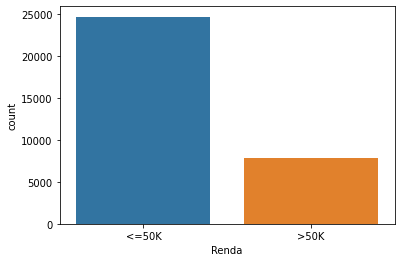

In [43]:
sns.countplot(renda['Renda'])

* Para teste da acuracia vamos aplicar a tecnica do gradiente boosting com a base desbalanceada

### Cria lista para a separação das variaveis x e y

In [44]:
lista_colunas_xminmax = ['Idade', 'Ganho Capital', 'Perda Capital', 'Relacao_Husband', 'Relacao_Not-in-family',
              'Relacao_Other-relative', 'Relacao_Own-child', 'Relacao_Unmarried',
              'Relacao_Wife', 'Raca_Amer-Indian-Eskimo', 'Raca_Asian-Pac-Islander',
              'Raca_Black', 'Raca_Other', 'Raca_White', 'Sexo_Female', 'Sexo_Male']

### Cria as variaveis x e y para aplicar algoritmo de balanceamento da base de dados

In [45]:
X = X_minmax[lista_colunas_xminmax]
y = y_kbest

### Função para executar o treino, previsão do algoritmo e retornar a acuracia

In [46]:
def treina_retorna_acuracia(X, y):
    
    #Separa base de treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

    # treina o algoritmo
    model = XGBClassifier()
    model.fit(X_train, y_train, eval_metric='rmse')
    y_pred = model.predict(X_test)
    
    #Retorna acuracia
    accuracy = accuracy_score(y_test, y_pred)     
    
    return accuracy

* Chama a função com a base desbalanceada que faz o treinamento, a previsão e retorna a acuracia do modelo com a base desbalanceada

In [47]:
acuracia = treina_retorna_acuracia(X, y)
print("Acuracia: %.2f%%" % (acuracia * 100.0))

Acuracia: 82.41%


### Matriz de confusão com a base de dados desbalanceada

In [48]:
def retorna_matriz_confusao(X, y):
    
    #Separa base de treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

    # treina o algoritmo
    model = XGBClassifier()
    model.fit(X_train, y_train, eval_metric='rmse')
    y_pred = model.predict(X_test)
    
    #Retorna matriz de confusão
    conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
    
    return conf_mat

### Chama a função para retornar a matriz de confusão com os dados desbalanceados

In [49]:
conf_mat = retorna_matriz_confusao(X, y)
print('Matriz de Confusão matrix:\n', conf_mat)

Matriz de Confusão matrix:
 [[4056  307]
 [ 710  709]]


### Analisando a matriz de confusão temos:

* Previu que recebem <=50k 4056 vezes corretamente;
* Previu que recebem >50k 709 vezes corretamente;
* Previu que recebem <=50k 307 vezes incorretamente
* Previu que recebem >50k 710 vezes incorretamente

### Função com todos os algoritmos e faz chamada a anterior no final gera um dataframe com as acuracias

In [50]:
def testa_algoritmo_base_desbalanceada(X, y):
    
    # Cria data frame com o resultados da acuracia dos algoritmos
    df_resultado_algoritmos = pd.DataFrame(columns = ['Algoritmo' , 'Acuracia'])
    
    print("Executando algoritmo Nearmiss")
    nm1 = NearMiss(version=1)
    X_resampled_nm1, y_resampled = nm1.fit_resample(X, y)
    resultado = treina_retorna_acuracia(X_resampled_nm1, y_resampled)    
    df_resultado_algoritmos = df_resultado_algoritmos.append({'Algoritmo': 'Nearmiss', 'Acuracia': resultado * 100}, ignore_index=True)
    
    print("Executando algoritmo AllKNN")    
    allknn = AllKNN()
    X_resampled, y_resampled = allknn.fit_resample(X, y)
    resultado = treina_retorna_acuracia(X_resampled, y_resampled)
    df_resultado_algoritmos = df_resultado_algoritmos.append({'Algoritmo': 'AllKNN', 'Acuracia': resultado * 100}, ignore_index=True)
    
    print("Executando algoritmo NeighbourhoodCleaningRule")    
    ncr = NeighbourhoodCleaningRule()
    X_resampled, y_resampled = ncr.fit_resample(X, y)
    resultado = treina_retorna_acuracia(X_resampled, y_resampled)
    df_resultado_algoritmos = df_resultado_algoritmos.append({'Algoritmo': 'NeighbourhoodCleaningRule', 'Acuracia': resultado * 100}, ignore_index=True)
    
    print("Executando algoritmo Smote")    
    X_resampled, y_resampled = SMOTE().fit_resample(X, y)    
    resultado = treina_retorna_acuracia(X_resampled, y_resampled)
    df_resultado_algoritmos = df_resultado_algoritmos.append({'Algoritmo': 'Smote', 'Acuracia': resultado * 100}, ignore_index=True)
    
    print("Executando algoritmo Smoteenn")    
    smote_enn = SMOTEENN(random_state=0)
    X_resampled, y_resampled = smote_enn.fit_resample(X, y)    
    resultado = treina_retorna_acuracia(X_resampled, y_resampled)
    df_resultado_algoritmos = df_resultado_algoritmos.append({'Algoritmo': 'Smoteenn', 'Acuracia': resultado * 100}, ignore_index=True)
    
    print("Executando algoritmo SmoteTomek")
    smote_tomek = SMOTETomek(random_state=0)
    X_resampled, y_resampled = smote_tomek.fit_resample(X, y)
    resultado = treina_retorna_acuracia(X_resampled, y_resampled)
    df_resultado_algoritmos = df_resultado_algoritmos.append({'Algoritmo': 'SmoteTomek', 'Acuracia': resultado * 100}, ignore_index=True)
    
    return df_resultado_algoritmos

### Faz o teste com todos os algoritmos de balanceamento

In [51]:
df_resultado_algoritmos = testa_algoritmo_base_desbalanceada(X, y)

Executando algoritmo Nearmiss
Executando algoritmo AllKNN
Executando algoritmo NeighbourhoodCleaningRule
Executando algoritmo Smote
Executando algoritmo Smoteenn
Executando algoritmo SmoteTomek


### Lista com o resultado de acuracia dos algoritmos

In [52]:
df_resultado_algoritmos.sort_values(by='Acuracia', ascending=False)

,Algoritmo,Acuracia
4,Smoteenn,99.383896
1,AllKNN,94.478820
2,NeighbourhoodCleaningRule,85.539359
5,SmoteTomek,82.389360
3,Smote,82.297960
0,Nearmiss,69.903260


* Pelo resultado acima o melhor algoritmo de balanceamento foi o Smoteenn, sendo assim faremos a aplicação do algoritmo para o balanceamento da base de dados 

### Definindo o algoritmo smoteen que teve a melhor performance na base de dados para fazer o balanceamento da base de dados

In [53]:
smote_enn = SMOTEENN(random_state=0)

### Criando as variaveis X e y

In [54]:
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

In [55]:
X = X_resampled
y = y_resampled

### Medindo a acuracia do modelo com a base balanceada

In [56]:
acuracia = treina_retorna_acuracia(X, y)
print("Acuracia: %.2f%%" % (acuracia * 100.0))

Acuracia: 99.38%


### Matriz de confusão com a base balanceada

In [57]:
conf_mat = retorna_matriz_confusao(X, y)
print('Matriz de Confusão matrix:\n', conf_mat)

Matriz de Confusão matrix:
 [[2636    8]
 [  21 2042]]


### Analisando a nova matriz de confusão com a base balanceada temos:

* Previu que recebem <=50k 2636 vezes corretamente;
* Previu que recebem >50k 2042 vezes corretamente;
* Previu que recebem <=50k 8 vezes incorretamente
* Previu que recebem >50k 21 vezes incorretamente

# Divisão base de dados em treino, teste e validação

* Na seção abaixo esta sendo usado a classe GridSearchCV do sklearn para identificar os melhores hiperparametros para cada algorimo de machine learning utilizado, bem como a técnica de validação cruzada para validação e diminuição do overfiting do modelo

* Função utilizada para verificar os melhores hiperparametros para os algoritmos de machine learning e utiliza a técnica de validação cruzada para verificar os scores a fim de diminuir o overfiting

In [58]:
def retorna_melhores_parametros_score(X, y, param_grid, modelo, nome_alg):
    
    #Separa os dados em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    
    #Cria uma instancia de gridsearchcv
    grid_cv = GridSearchCV(estimator = modelo, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
    
    #Faz o treinamento utilizando o GridSearchCV
    if nome_alg == 'XGB':
        grid_cv.fit(X_train, y_train, eval_metric='rmse')
    else:
        grid_cv.fit(X_train, y_train)
        
    #Seta variavel com os melhores parametros        
    best_params = grid_cv.best_params_
    
    #Seta variavel com a media dos score usando a função cross_val_score
    medias = cross_val_score(modelo, X_test, y_test, cv=5)
    media = sum(medias) / len(medias)
    
    # Retorna melhores parametros e media dos score
    return best_params, media

### Algoritmo XGB

In [59]:
# Seta os parametros
param_grid = {'max_depth': range (2, 10, 1),
              'n_estimators': range(60, 220, 40),
              'learning_rate': [0.1, 0.01, 0.05]}

# Definição do modelo
modelo = XGBClassifier(objective= 'binary:logistic', nthread=4, seed=42)

# Chama a função que retorna os melhores parametros e score
best_params, score = retorna_melhores_parametros_score(X, y, param_grid, modelo, 'XGB')

Fitting 3 folds for each of 96 candidates, totalling 288 fits
[09:59:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:59:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:59:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:59:2

### Melhores parametros e score algoritmo XGB

In [60]:
print('best_params: ',best_params)
print("Score: %.2f%%" % (score * 100.0))

best_params:  {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 180}
Score: 98.45%


### Algoritmo Random Forest

In [61]:
# Seta os parametros
param_grid = {'bootstrap': [True],
              'max_depth': [70, 80, 90, 100],
              'max_features': [2, 3],
              'min_samples_leaf': [3, 4, 5],
              'min_samples_split': [4, 5, 6],
              'n_estimators': [500, 600, 700, 1000]}

# Definição do modelo
modelo = RandomForestClassifier(random_state=1)

# Chama a função que retorna os melhores parametros e score
best_params, score = retorna_melhores_parametros_score(X, y, param_grid, modelo, 'RF')

Fitting 3 folds for each of 288 candidates, totalling 864 fits


### Melhores parametros e score algoritmo Random Forest

In [62]:
print('best_params: ',best_params)
print("Score: %.2f%%" % (score * 100.0))

best_params:  {'bootstrap': True, 'max_depth': 70, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 700}
Score: 98.60%


### Algoritmo Decision Tree

In [63]:
# Seta os parametros
param_grid = { 'criterion':['gini','entropy'],
               'max_depth': np.arange(3, 15)}

# Definição do modelo
modelo = DecisionTreeClassifier(random_state = 1)

# Chama a função que retorna os melhores parametros e score
best_params, score = retorna_melhores_parametros_score(X, y, param_grid, modelo, 'DECISIONTREE')

Fitting 3 folds for each of 24 candidates, totalling 72 fits


### Melhores parametros e score algoritmo Decision Tree

In [64]:
print('best_params: ',best_params)
print("Score: %.2f%%" % (score * 100.0))

best_params:  {'criterion': 'entropy', 'max_depth': 14}
Score: 98.15%
